In [1]:
# Import necessary libraries
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
import pytensor.tensor as pt
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot's context and appearance
sns.set_context("notebook", font_scale=1.5,
rc={"lines.linewidth": 2.5,
'axes.titlesize': 35})
# Set the maximum number of columns and rows to be displayed
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10

In [2]:
# Read and process data for response accuracy
df_ra = pd.read_csv("final_project_ra.csv")
df_ra.index.set_names("Participant",inplace=True)
df_ra

,10.0083,10.00831,10.0167,10.01671,10.0333,...,20.03331,20.0667,20.06671,20.1333,20.13331
Participant,,,,,,,,,,,
0,1,1,0,1,1,...,1,1,1,1,0
1,0,0,1,1,1,...,0,0,0,1,1
2,0,1,0,1,0,...,0,1,1,1,1
3,0,0,0,0,0,...,0,1,1,1,1
4,0,0,0,1,0,...,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15,0,1,0,0,1,...,1,1,1,1,1
16,1,1,0,1,1,...,0,1,1,1,0
17,0,1,0,0,1,...,1,1,1,1,1


In [3]:
# Read and process data for response time
df_rt = pd.read_csv("final_project_rt.csv")
df_rt.index.set_names("Participant",inplace=True)
df_rt

,10.0083,10.00831,10.0167,10.01671,10.0333,...,20.03331,20.0667,20.06671,20.1333,20.13331
Participant,,,,,,,,,,,
0,4.3824,3.9744,4.2535,5.8326,5.9659,...,5.0824,3.8574,4.3407,2.7661,4.0991
1,2.5825,3.3494,2.5257,1.8495,1.7578,...,5.2409,2.8828,5.2157,2.6494,10.9927
2,3.2161,8.7738,4.7657,7.7572,3.6158,...,5.1574,3.8244,4.5574,4.1910,5.9240
3,3.2075,4.0742,2.3245,3.1577,1.7078,...,2.7992,2.4992,3.5658,5.1659,10.5689
4,4.1910,6.2990,2.2909,4.2410,2.5408,...,23.9061,2.8075,5.1239,3.0325,4.7909
...,...,...,...,...,...,...,...,...,...,...,...
15,2.7744,4.1576,3.1325,4.1243,3.3908,...,6.8073,4.3784,3.9408,3.0492,4.5824
16,2.9659,3.0825,2.3991,2.7411,2.8703,...,2.7077,7.2242,6.4325,2.3491,11.4771
17,7.2574,6.2325,3.9327,11.8572,3.2992,...,8.3238,3.0451,14.4817,2.6661,8.8657


In [4]:
# Convert dataframes to numpy arrays and get their shapes
RT = df_rt.dropna().to_numpy()
I,J = RT.shape
I,J

(20, 20)

In [7]:
# Convert dataframes to numpy arrays and get their shapes
X = df_ra.dropna().to_numpy()
I,J = X.shape
I,J

(20, 20)

In [8]:
# Describe object type columns of df_ra
df_ra.astype('object').describe()

,10.0083,10.00831,10.0167,10.01671,10.0333,...,20.03331,20.0667,20.06671,20.1333,20.13331
count,20,20,20,20,20,...,20,20,20,20,20
unique,2,2,2,2,2,...,2,2,2,2,2
top,0,0,0,1,1,...,0,1,1,1,1
freq,13,13,15,15,10,...,12,15,17,18,13


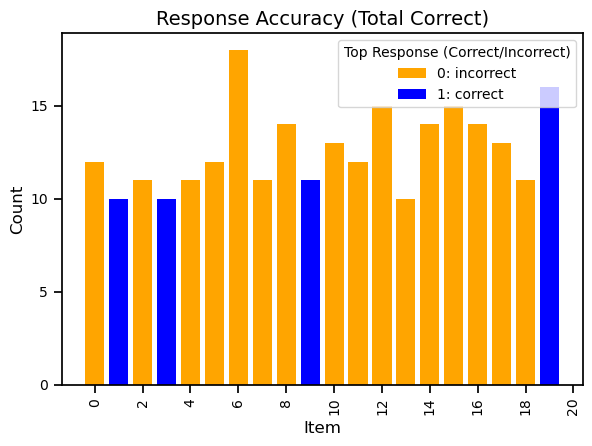

In [9]:
# Calculate and gather majority count for response accuracy
majority_count = df_ra.apply(lambda x: pd.Series([x.value_counts().idxmax(), x.value_counts().max()], index=['Top Response', 'Count']), axis=1)
majority_count['Item'] = majority_count.index

# Plot the response accuracy
fig, ax = plt.subplots()

# Iterate through the majority_count DataFrame and create a bar plot
for i, row in majority_count.iterrows():
    # Set the color of the bar to 'orange' if the top response is 1, otherwise 'blue'
    color = 'orange' if row['Top Response'] == 1 else 'blue'
    ax.bar(row['Item'], row['Count'], color=color)

# Set plot labels and title
ax.set_xlabel('Item', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Response Accuracy (Total Correct)', fontsize=14)
# Add a legend indicating what the colors represent
ax.legend(['0: incorrect', '1: correct'], title='Top Response (Correct/Incorrect)', fontsize=10, title_fontsize=10, loc='upper right')

# Customize the ticks on the x and y axes
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Set x-axis ticks to increments of 2
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()

In [10]:
# Describe df_rt
df_rt.describe()

,10.0083,10.00831,10.0167,10.01671,10.0333,...,20.03331,20.0667,20.06671,20.1333,20.13331
count,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.622985,5.117025,3.609270,5.118755,3.060440,...,6.304850,3.179915,5.660305,3.290780,6.622870
std,1.273563,2.076512,1.424854,2.495515,1.462885,...,4.630291,1.110366,3.128747,1.517773,3.699962
min,2.082800,2.324200,2.140900,1.849500,1.707800,...,2.316100,2.115900,2.574400,2.024300,2.324500
25%,2.743150,3.680375,2.494050,3.488900,2.067200,...,4.378225,2.701425,3.772025,2.616075,4.024175
50%,3.211800,4.686750,3.255550,4.490850,2.705550,...,5.249100,2.920150,4.840650,2.890800,5.707500
75%,4.153350,6.249125,4.279550,6.240650,3.578450,...,6.905200,3.235700,6.395000,3.245500,8.359450
max,7.257400,9.307100,7.373800,11.857200,7.532200,...,23.906100,7.224200,14.481700,8.890400,17.289400


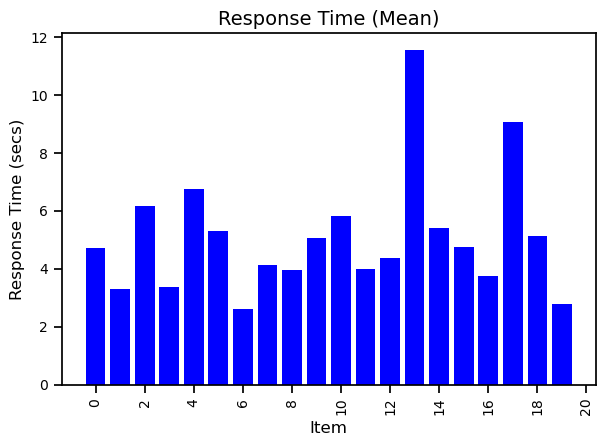

In [9]:
# Calculate the mean response time and plot it
mean_rt = df_rt.mean(axis=1)

fig, ax = plt.subplots()

# Create a bar plot using the mean response time
ax.bar(mean_rt.index, mean_rt.values, color='blue')

# Set plot labels and title
ax.set_xlabel('Item', fontsize=12)
ax.set_ylabel('Response Time (secs)', fontsize=12)
ax.set_title('Response Time (Mean)', fontsize=14)

# Customize the ticks on the x and y axes
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Set x-axis ticks to increments of 2
ax.xaxis.set_major_locator(plt.MultipleLocator(2))

plt.tight_layout()
plt.show()

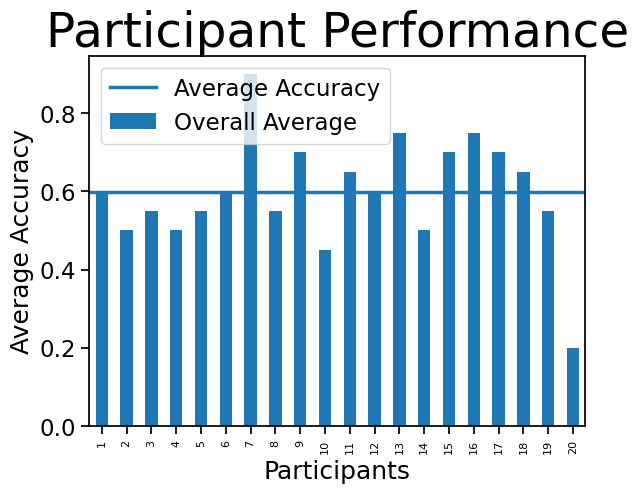

In [11]:
# Calculate the average accuracy for each participant
average_accuracy_per_participant = df_ra.mean(axis=1)

# Create bar graph
fig, ax = plt.subplots()

# Bar graph for the average accuracy
average_accuracy_per_participant.plot(kind='bar', ax=ax)

# Add a horizontal line for the average accuracy
ax.axhline((df_ra.sum(axis=1)/J).mean())

# Set the xticks to be numbers from 1 to the number of participants
ax.set_xticks(range(len(average_accuracy_per_participant)))

# Set the xtick labels to be numbers from 1 to the number of participants
ax.set_xticklabels(range(1, len(average_accuracy_per_participant) + 1))

# Reduce the font size for x-axis labels to ensure legibility
ax.tick_params(axis='x', labelsize=8)

# Set title, x-label, and y-label
ax.set_title('Participant Performance')
ax.set_xlabel('Participants')
ax.set_ylabel('Average Accuracy')

# Show legend
ax.legend(['Average Accuracy', 'Overall Average'])

plt.show()

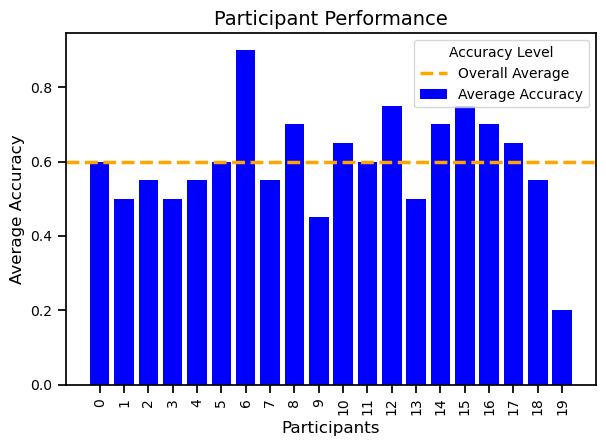

In [14]:
# Calculate the average accuracy for each participant
average_accuracy_per_participant = df_ra.mean(axis=1)

# Create bar graph
fig, ax = plt.subplots()

# Bar graph for the average accuracy - setting the color to 'blue' for consistency
ax.bar(range(len(average_accuracy_per_participant)), average_accuracy_per_participant.values, color='blue')

# Add a horizontal line for the average accuracy
ax.axhline((df_ra.sum(axis=1)/J).mean(), color='orange', linestyle='--')

# Set the xticks to be numbers from 0 to the number of participants - 1
ax.set_xticks(range(len(average_accuracy_per_participant)))

# Set the xtick labels to be numbers from 0 to the number of participants - 1
ax.set_xticklabels(range(len(average_accuracy_per_participant)))

# Customize the ticks on the x and y axes
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Set title, x-label, and y-label with consistent font sizes
ax.set_title('Participant Performance', fontsize=14)
ax.set_xlabel('Participants', fontsize=12)
ax.set_ylabel('Average Accuracy', fontsize=12)

# Show legend, with consistent font size and add title to the legend
ax.legend(['Overall Average', 'Average Accuracy'], title='Accuracy Level', fontsize=10, title_fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


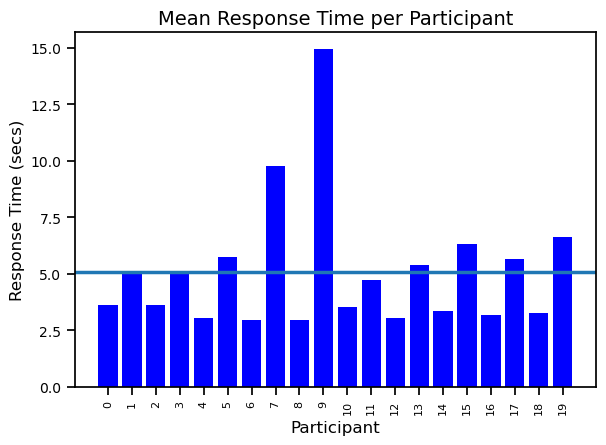

In [11]:
# Calculate the mean response time across the columns
mean_rt = df_rt.mean(axis=0)

fig, ax = plt.subplots()

# Assigning each participant a new ID from 0 to 19 (or however many participants you have minus 1)
new_participant_ids = range(len(mean_rt))

ax.bar(new_participant_ids, mean_rt.values, color='blue')

# Add a horizontal line representing the overall mean response time
ax.axhline((df_rt.sum(axis=1)/J).mean())

# Set plot labels and title
ax.set_xlabel('Participant', fontsize=12)
ax.set_ylabel('Response Time (secs)', fontsize=12)
ax.set_title('Mean Response Time per Participant', fontsize=14)

# Customize the ticks on the x and y axes
ax.set_xticks(new_participant_ids)
ax.set_xticklabels(new_participant_ids, fontsize=8, rotation=90)
plt.yticks(fontsize=10)

# Increase space for the x-axis labels
plt.gcf().subplots_adjust(bottom=0.15)

plt.tight_layout()
plt.show()

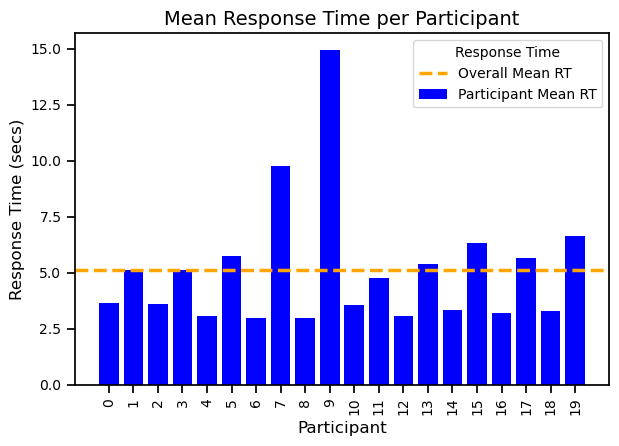

In [13]:
# Calculate the mean response time across the columns
mean_rt = df_rt.mean(axis=0)

fig, ax = plt.subplots()

# Assigning each participant a new ID from 0 to 19 (or however many participants you have minus 1)
new_participant_ids = range(len(mean_rt))

# Set bar color to 'blue' for consistency
ax.bar(new_participant_ids, mean_rt.values, color='blue')

# Add a horizontal line representing the overall mean response time, with 'orange' color for consistency
overall_mean_rt = mean_rt.mean()
ax.axhline(overall_mean_rt, color='orange', linestyle='--')

# Set plot labels and title with consistent font sizes
ax.set_xlabel('Participant', fontsize=12)
ax.set_ylabel('Response Time (secs)', fontsize=12)
ax.set_title('Mean Response Time per Participant', fontsize=14)

# Customize the ticks on the x and y axes with consistent font sizes
ax.set_xticks(new_participant_ids)
ax.set_xticklabels(new_participant_ids, fontsize=10, rotation=90)
plt.yticks(fontsize=10)

# Legend added for clarity, with consistent font sizes and title
ax.legend(['Overall Mean RT', 'Participant Mean RT'], title='Response Time', fontsize=10, title_fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
# This code is for easy items. The condition is top==1.
items_easy = df_ra.astype("category").describe().T.query("top==1").index.to_numpy()

df_ra_easy = df_ra.filter(items=items_easy)
df_rt_easy = df_rt.filter(items=items_easy)

# This code is for hard items. The condition is top==0.
items_hard = df_ra.astype("category").describe().T.query("top==0").index.to_numpy()

df_ra_hard = df_ra.filter(items=items_hard)
df_rt_hard = df_rt.filter(items=items_hard)

In [16]:
print(f'Dataset1: students:{df_ra_easy.shape[0]}, items:{df_ra_easy.shape[1]}')
print(f'Dataset2: students:{df_ra_hard.shape[0]}, items:{df_ra_hard.shape[1]}')

Dataset1: students:20, items:11
Dataset2: students:20, items:9


In [17]:
def _ez_diffusion(a, v, t_er):
    
    # p_jk represents the scaled drift rate; it's computed by multiplying boundary separation 'a' with drift rate 'v'
    p_jk = v * a
    
    # h_jk represents the negative of the scaled drift rate
    h_jk = -p_jk
    
    # E_RT_kj calculates the expected response time using given parameters; it's based on a mathematical model for response time
    E_RT_kj = ((1/2) * (a * (1/v))) * (
        (1 - np.exp(h_jk) ) / (1+np.exp(h_jk))
    ) + t_er
    
    # V_RT_kj calculates the variance in response time; it's also based on a mathematical model for response time
    V_RT_kj = (1/2) * (
        a * np.power(1/v,3) * (
            ( 2 * h_jk * np.exp(h_jk) - np.exp(2*h_jk) + 1) / (
                np.power((np.exp(h_jk) + 1),2)
            )
        )
    )

    return E_RT_kj, V_RT_kj, p_jk

In [18]:
def get_model(RT = None, X=None):
    I, J = RT.shape if RT is not None else (1,1) # Get the shape of RT; default to (1,1) if RT is None
    with pm.Model() as ezdiffusion:
        
        # Define the prior distributions for the boundary, drift, and non-decision time parameters
        a = pm.Lognormal("boundary",0,1,shape = (I,1))
        v = pm.Lognormal("drift",0,1,shape = (I,1))
        t_er = pm.Lognormal("non-decision",0,1,shape = (I,1))
        
        # Compute the expected response time, variance, and scaled drift rate using the _ez_diffusion function
        E_RT_kj, S_RT_kj, p_kj = _ez_diffusion(a, v, t_er)
        
        # Define the likelihood for the observed RT and X using the Normal and Bernoulli distributions
        RT = pm.Normal("RT",E_RT_kj, S_RT_kj, shape = (I,J), observed = RT)
        X = pm.Bernoulli("X", pm.invlogit(p_kj), shape = (I,J), observed = X)
        
    return ezdiffusion

In [19]:
likl_arr = []

# Loop over various values of boundary 'a', drift rate 'v', and non-decision time 't_er'
for a, v, t_er in zip(np.linspace(0, 1, 50), np.linspace(-5, 5, 50), np.linspace(0, 5, 50)):
    
    # Compute expected response time, variance, and scaled drift rate using the _ez_diffusion function
    E_RT_kj, S_RT_kj, p_kj = _ez_diffusion(a, v, t_er)  
    likl_arr.append(E_RT_kj)

likl_arr

[0.0,
 0.10214485656566086,
 0.20449691086984412,
 0.3070539632402309,
 0.40981323138992715,
 0.5127719728345028,
 0.6159279705847468,
 0.7192798868756543,
 0.8228274975506217,
 0.9265718220857316,
 1.030515162782773,
 1.1346610628261946,
 1.2390141877746756,
 1.3435801293919412,
 1.4483651250279463,
 1.553375680451825,
 1.6586180795600682,
 1.7640977613594488,
 1.8698185439774422,
 1.975781678507913,
 2.0819847240208555,
 2.1884202511660917,
 2.295074407630437,
 2.4019254157860805,
 2.5089421209787606,
 2.61608276455975,
 2.7232942105221154,
 2.8305118939339744,
 2.9376607632714515,
 3.044657435492149,
 3.1514136563744723,
 3.2578409597423184,
 3.363856173960869,
 3.469387186760052,
 3.5743782214253224,
 3.6787938631916197,
 3.782621232892701,
 3.885870009256665,
 3.988570374296962,
 4.090769297274431,
 4.192525796170322,
 4.293905880993602,
 4.394977802576909,
 4.495808053830951,
 4.596458360440131,
 4.696983707475655,
 4.7974313083883935,
 4.89784034200614,
 4.998242254284808,
 5.09

<Axes: ylabel='Density'>

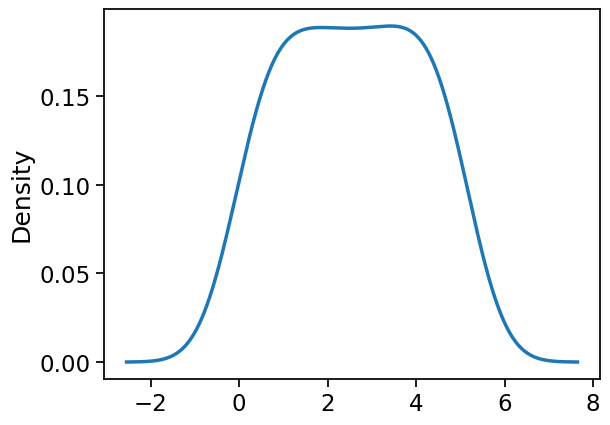

In [20]:
# Convert the likelihood array to a Pandas Series and plot its Kernel Density Estimation (KDE)
pd.Series(likl_arr).plot(kind="kde")

In [21]:
ezdiffusion = get_model() # Only for displaying Prior Distributions
ezdiffusion1 = get_model(df_rt_easy, df_ra_easy)
ezdiffusion2 = get_model(df_rt_hard, df_ra_hard)

In [22]:
#prior distribution
with ezdiffusion:

    prior_samples = pm.sample_prior_predictive(samples=200)

Sampling: [RT, X, boundary, drift, non-decision]


In [23]:
prior_samples

Inference data with groups:
	> prior

In [24]:
# Getting the Shape of the Prior Samples
prior_samples.prior.X.shape

(1, 200, 1, 1)

In [25]:
# Modifying the Prior Samples
import xarray
prior_samples.add_groups(dict(prior_predictive=prior_samples.prior.X))
prior_samples.add_groups(dict(observed_data=xarray.Dataset(dict(X= xarray.DataArray(X)))))

In [23]:
prior_samples

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

C:\Users\ekram\anaconda3\Lib\site-packages\arviz\utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'boundary\n0, 0'}>,
        <Axes: title={'center': 'drift\n0, 0'}>,
        <Axes: title={'center': 'non-decision\n0, 0'}>],
       [<Axes: title={'center': 'X\n0, 0'}>,
        <Axes: title={'center': 'RT\n0, 0'}>, <Axes: >]], dtype=object)

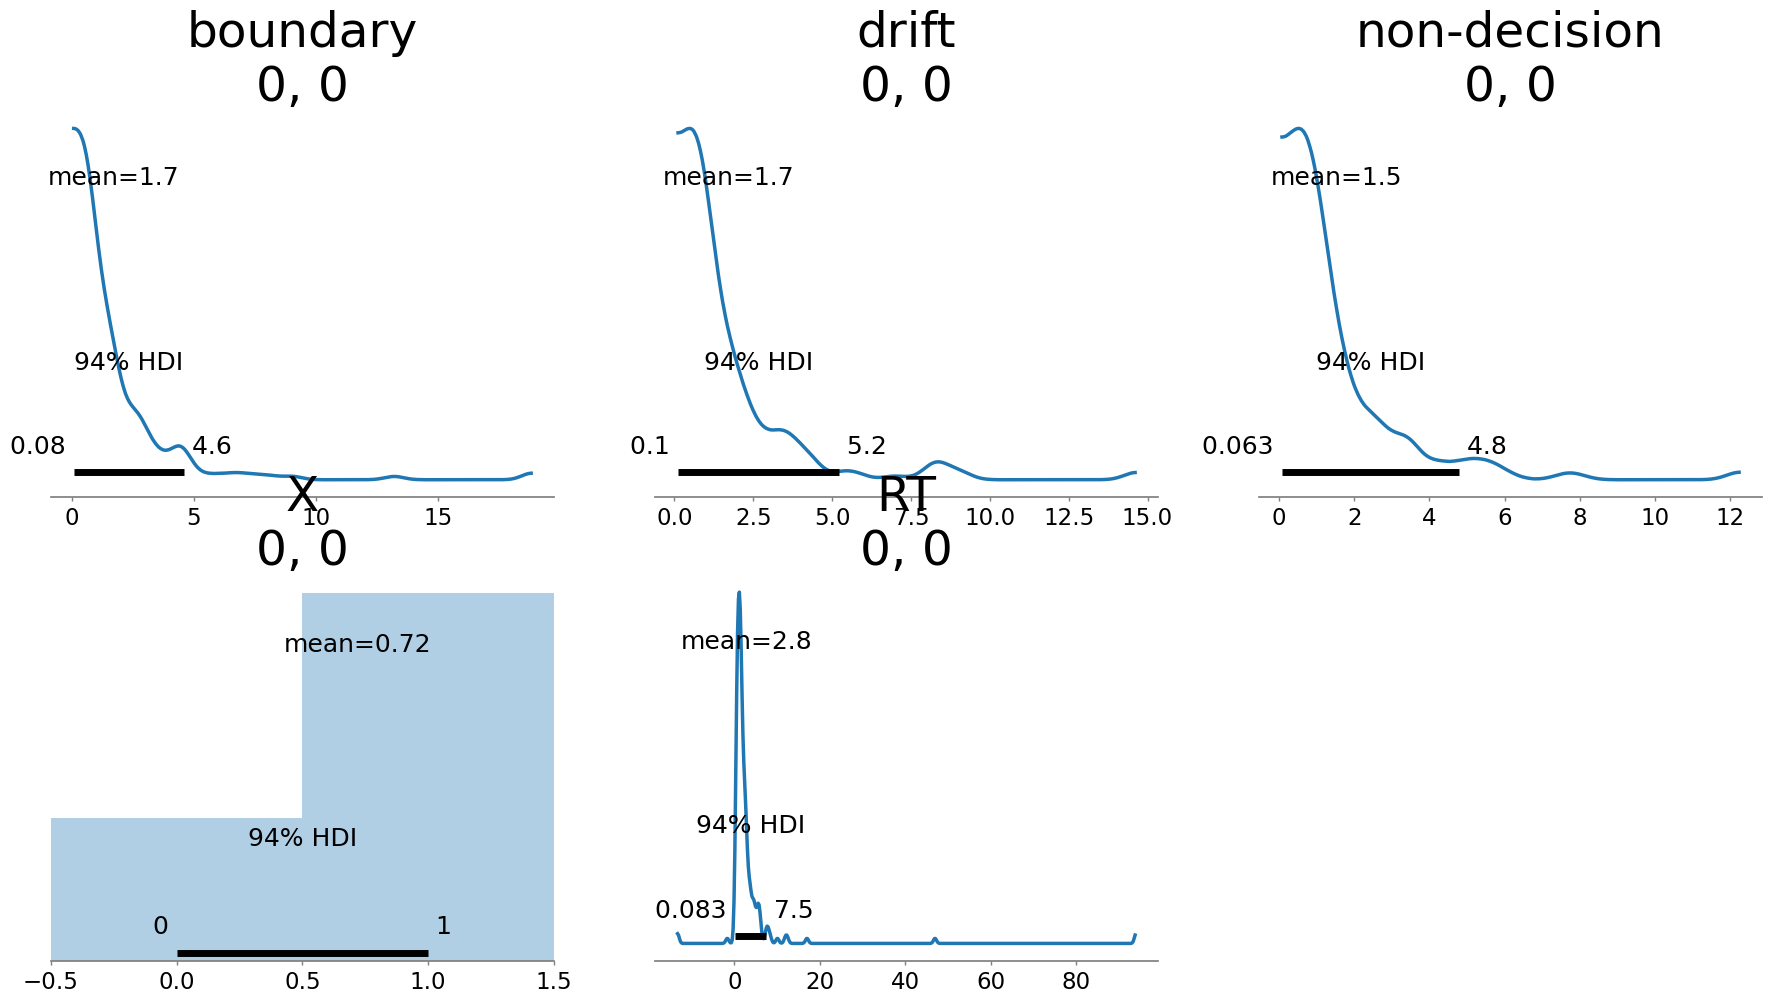

In [26]:
# Plotting the Prior Distribution
az.plot_posterior(prior_samples, group="prior")

<Figure size 1500x1000 with 0 Axes>

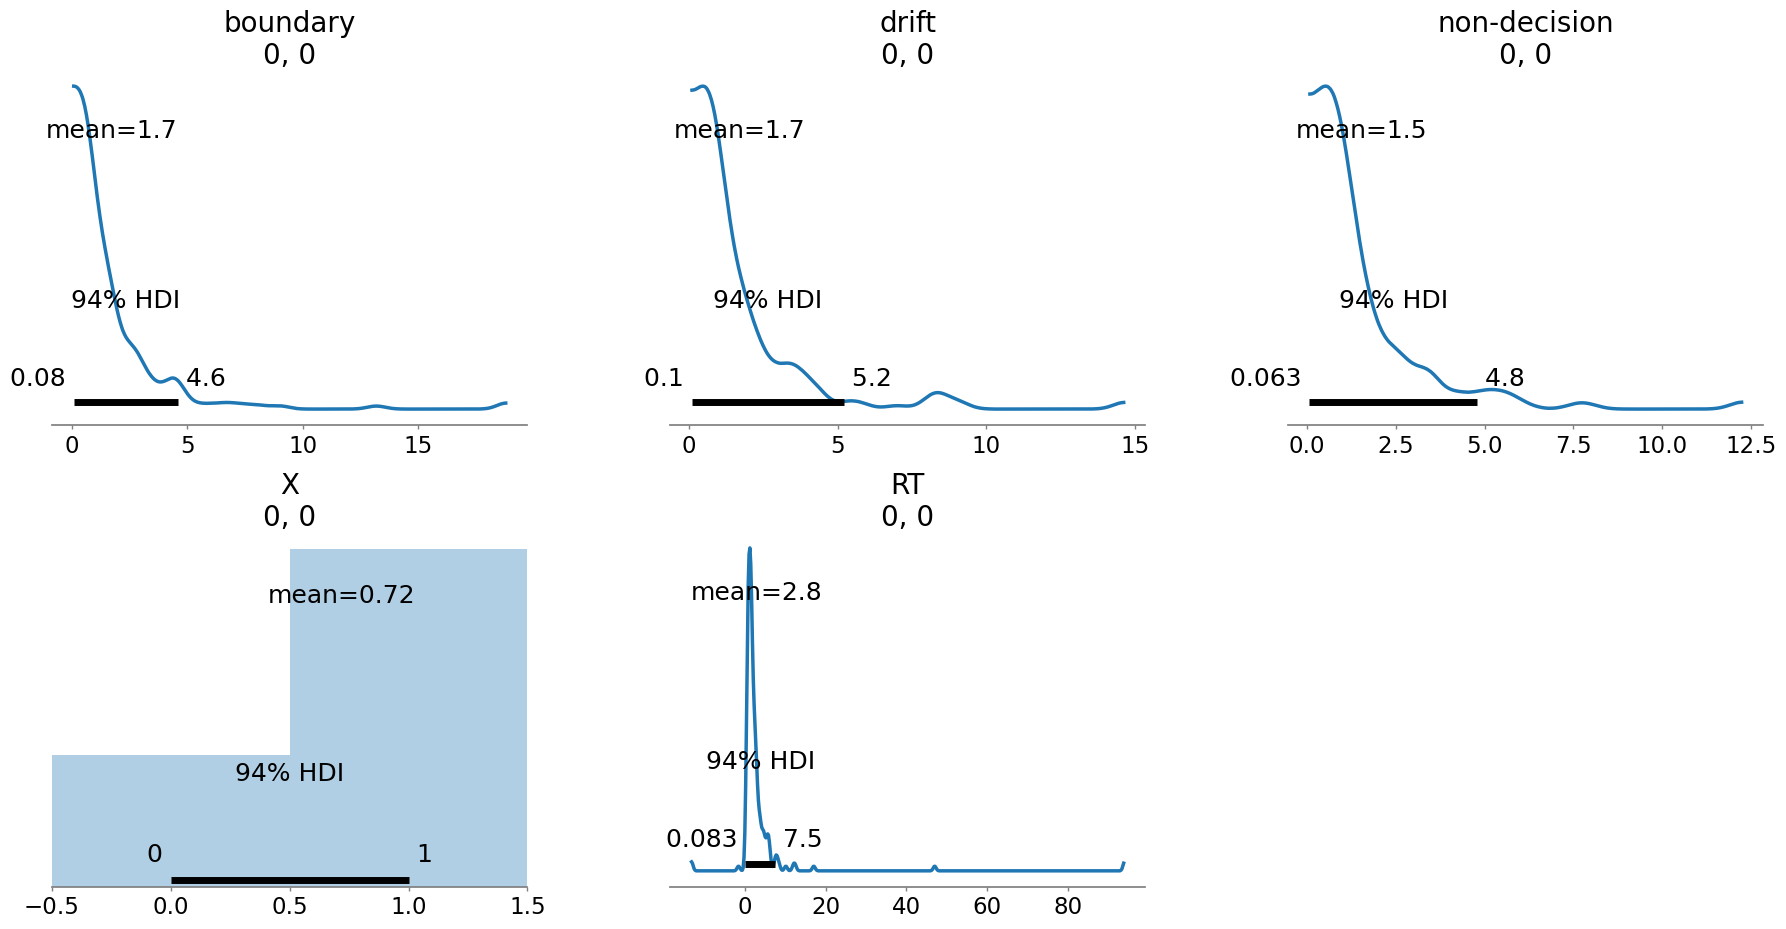

In [27]:
# Set the overall figure size
plt.figure(figsize=(15,10))

# Call the az.plot_posterior function
az.plot_posterior(prior_samples, group="prior")

# Get current figure and adjust subplots
fig = plt.gcf()
plt.subplots_adjust(top=0.85, wspace=0.3, hspace=0.3)  # Adjust the spacing

# Iterate over all axes (subplots) and set the title size
for ax in fig.axes:
    title = ax.get_title()
    ax.set_title(title, fontsize=20)

plt.show()

array([[<Axes: ylabel='drift\n0, 0'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='non-decision\n0, 0'>, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: ylabel='X\n0, 0'>, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='boundary\n0, 0', ylabel='RT\n0, 0'>,
        <Axes: xlabel='drift\n0, 0'>,
        <Axes: xlabel='non-decision\n0, 0'>, <Axes: xlabel='X\n0, 0'>]],
      dtype=object)

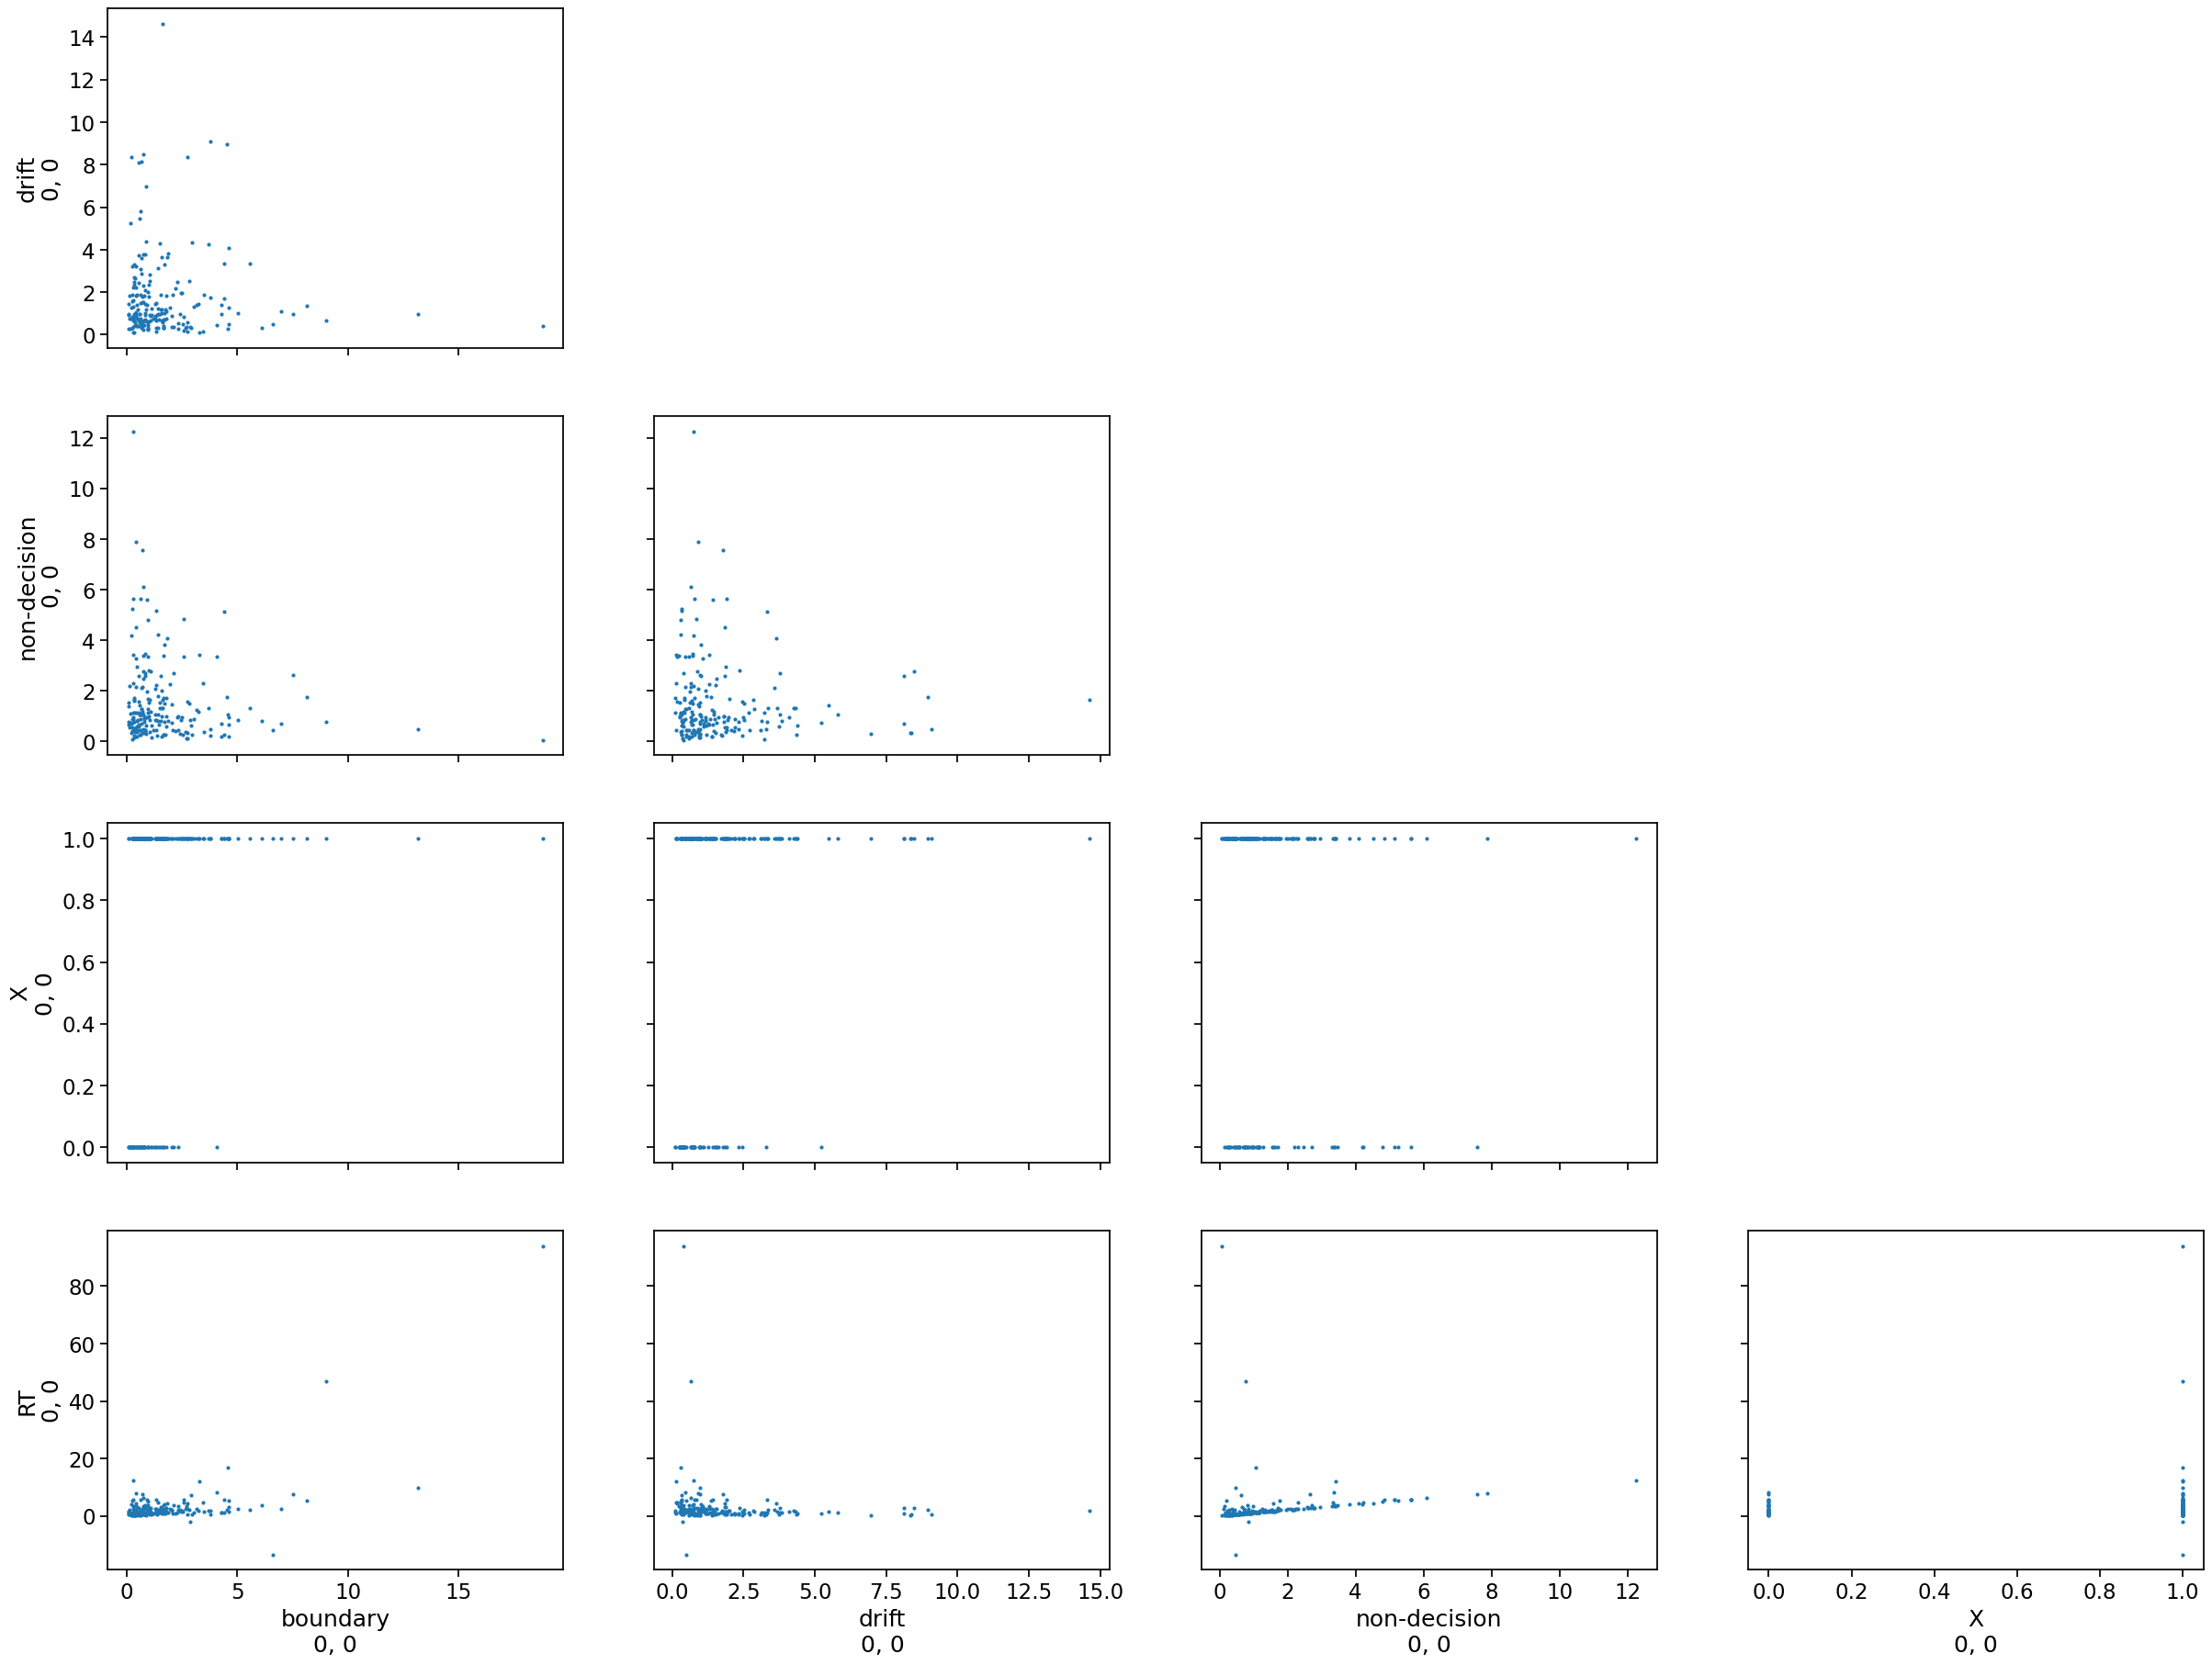

In [39]:
# IGNORE Plotting
az.plot_pair(prior_samples, group="prior")

In [40]:
#prior predictive for easy
with ezdiffusion1:

    prior_samples1 = pm.sample_prior_predictive(samples=200)

Sampling: [RT, X, boundary, drift, non-decision]


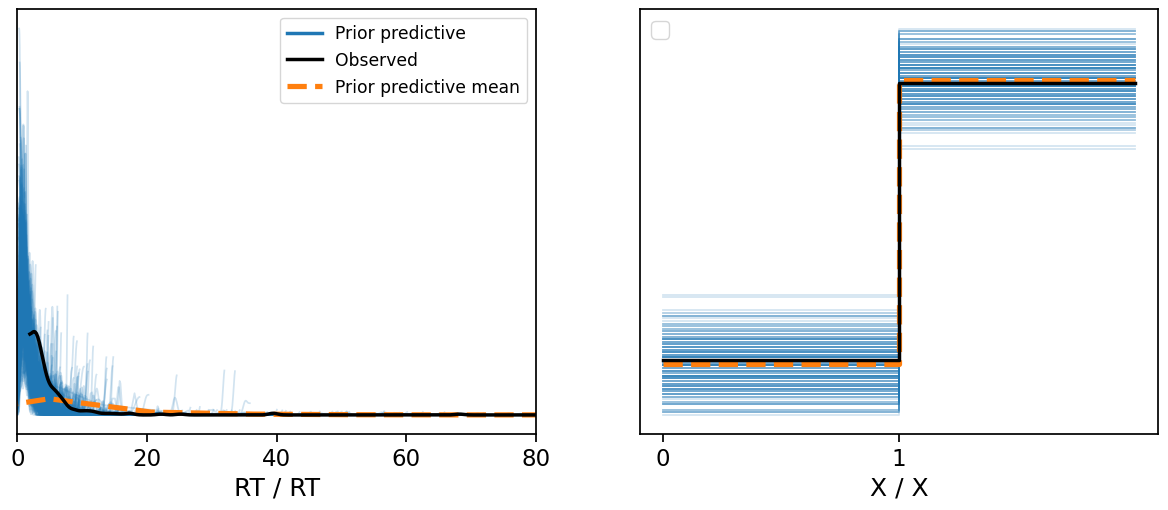

In [41]:
axs = az.plot_ppc(prior_samples1, group="prior", observed=True)
axs[0].set_xlim(0,80)
axs[1].set_xticks([0,1])
plt.show()

In [42]:
#prior predictive for hard
with ezdiffusion2:

    prior_samples1 = pm.sample_prior_predictive(samples=200)

Sampling: [RT, X, boundary, drift, non-decision]


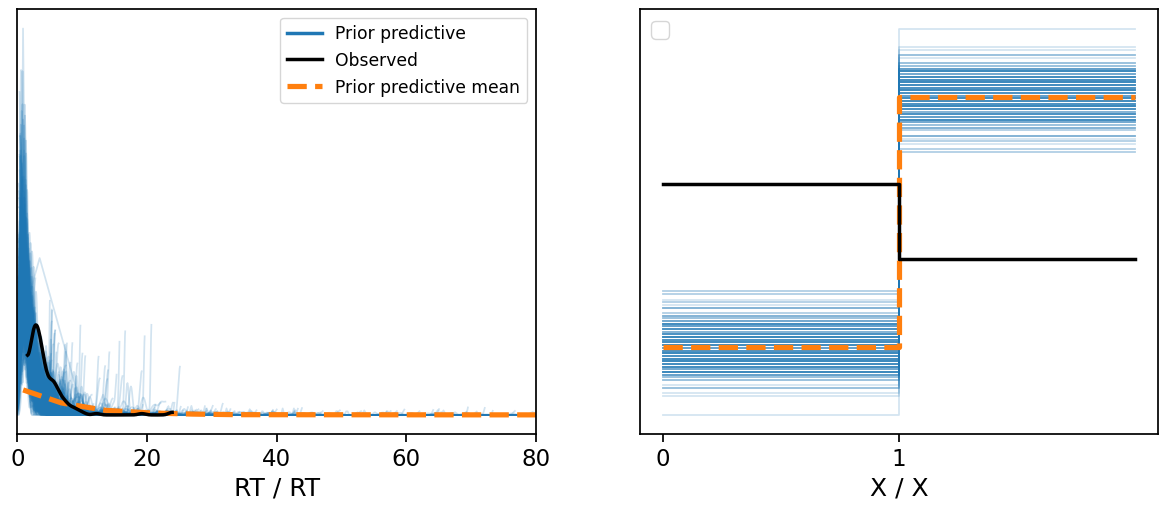

In [43]:
#Plotting prior predictive for hard condition
axs = az.plot_ppc(prior_samples1, group="prior", observed=True)
axs[0].set_xlim(0,80)
axs[1].set_xticks([0,1])
plt.show()

In [44]:
#Sampling posterior with NUTS for easy condition
with ezdiffusion1:

    posterior_samples1 = pm.sample(draws=2000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [boundary, drift, non-decision]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 66 seconds.


In [45]:
#Summary of posterior samples
az.summary(posterior_samples1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"boundary[0, 0]",2.822,0.256,2.388,3.277,0.003,0.002,6639.0,4526.0,1.0
"boundary[1, 0]",3.072,0.269,2.639,3.579,0.003,0.002,8518.0,5326.0,1.0
"boundary[2, 0]",4.087,0.461,3.356,4.927,0.006,0.004,8172.0,5119.0,1.0
"boundary[3, 0]",2.898,0.191,2.556,3.252,0.002,0.002,8314.0,5451.0,1.0
"boundary[4, 0]",3.759,0.323,3.202,4.332,0.004,0.003,9328.0,5371.0,1.0
...,...,...,...,...,...,...,...,...,...
"non-decision[15, 0]",1.843,1.016,0.147,3.562,0.012,0.009,6231.0,4595.0,1.0
"non-decision[16, 0]",1.652,0.858,0.155,3.084,0.010,0.007,6658.0,4363.0,1.0
"non-decision[17, 0]",1.902,2.038,0.024,5.498,0.023,0.021,13140.0,5840.0,1.0
"non-decision[18, 0]",1.750,1.148,0.075,3.761,0.012,0.008,7770.0,4775.0,1.0


In [46]:
# Convert the MultiTrace object into a summary DataFrame
summary_df = az.summary(posterior_samples1, hdi_prob=0.94)  # 94% HDI is similar to a 95% CI

# Extract the "r_hat" column
r_hat_series = summary_df['r_hat']

# Generate summary statistics
r_hat_summary = r_hat_series.describe()

# Convert series to DataFrame and transpose it
r_hat_summary_df = pd.DataFrame(r_hat_summary).transpose()

# Print summary statistics DataFrame
r_hat_summary_df

,count,mean,std,min,25%,50%,75%,max
r_hat,60.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'boundary'}>,
        <Axes: title={'center': 'boundary'}>],
       [<Axes: title={'center': 'drift'}>,
        <Axes: title={'center': 'drift'}>],
       [<Axes: title={'center': 'non-decision'}>,
        <Axes: title={'center': 'non-decision'}>]], dtype=object)

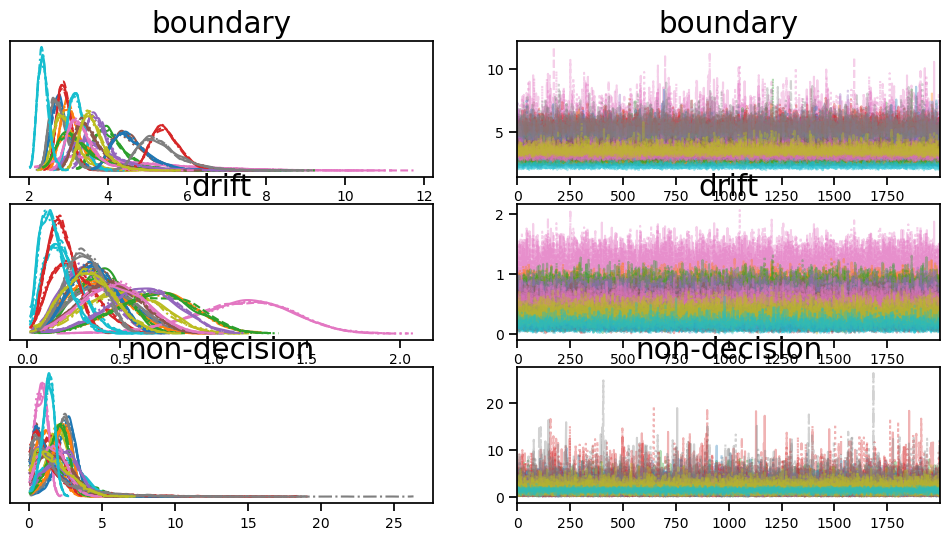

In [47]:
#Summary of posterior samples
az.plot_trace(posterior_samples1)

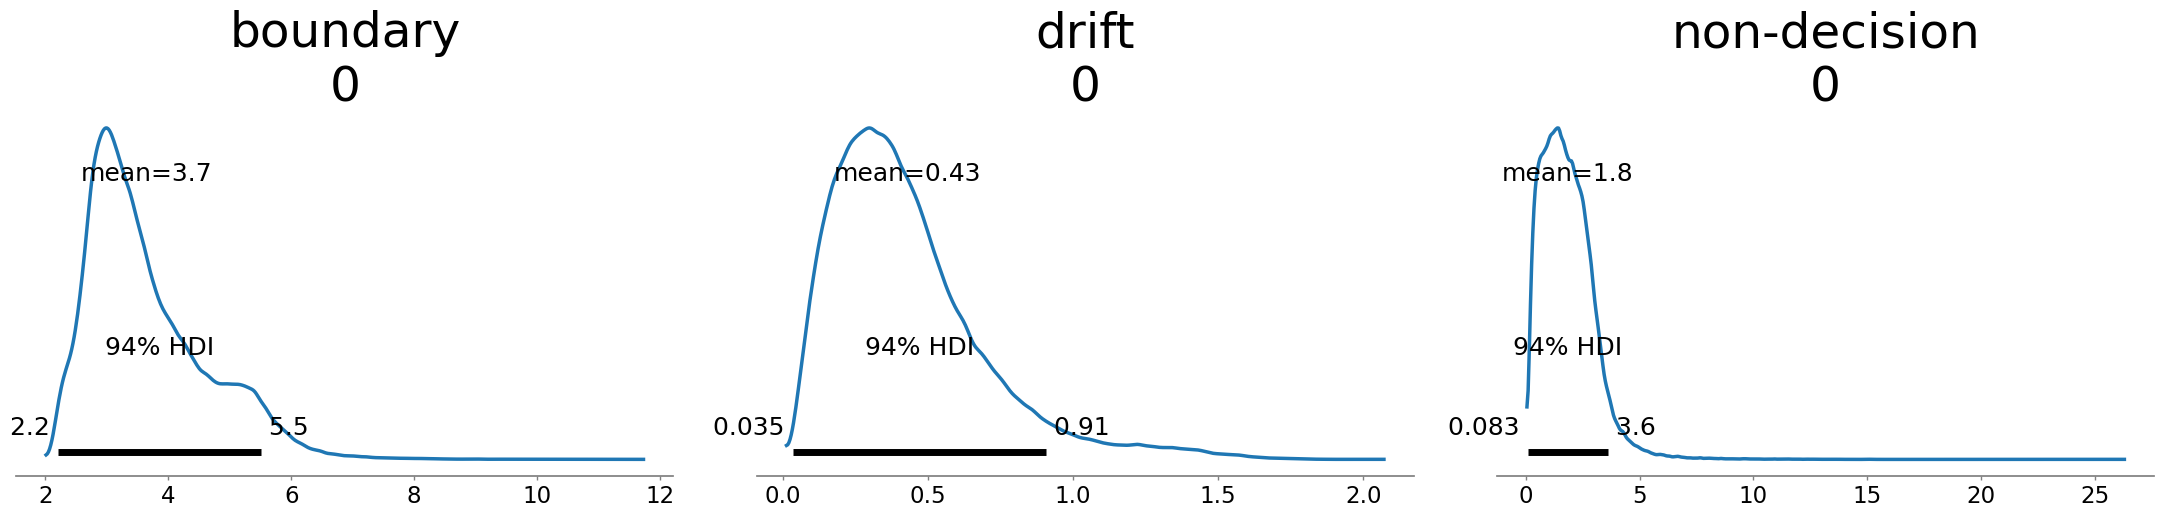

In [48]:
#Plotting the Posterior Distribution for posterior_samples1
az.plot_posterior(posterior_samples1, group="posterior", combine_dims={"boundary_dim_0", "drift_dim_0","non-decision_dim_0"})
plt.tight_layout()

In [49]:
#Sampling Posterior with NUTS for ezdiffusion2
with ezdiffusion2: 

    posterior_samples2 = pm.sample(draws=2000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [boundary, drift, non-decision]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 55 seconds.


In [50]:
# Summary of 'posterior_samples2'
az.summary(posterior_samples2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"boundary[0, 0]",2.746,0.212,2.387,3.142,0.003,0.002,4750.0,3958.0,1.0
"boundary[1, 0]",2.358,0.160,2.064,2.651,0.002,0.002,5855.0,4934.0,1.0
"boundary[2, 0]",2.642,0.192,2.298,2.991,0.003,0.003,3768.0,2721.0,1.0
"boundary[3, 0]",2.127,0.155,1.865,2.421,0.002,0.002,5504.0,4530.0,1.0
"boundary[4, 0]",3.858,0.246,3.430,4.330,0.003,0.002,10825.0,5718.0,1.0
...,...,...,...,...,...,...,...,...,...
"non-decision[15, 0]",2.521,0.629,1.223,3.575,0.013,0.009,3373.0,1618.0,1.0
"non-decision[16, 0]",1.857,0.312,1.242,2.397,0.005,0.004,4868.0,2655.0,1.0
"non-decision[17, 0]",2.869,0.978,0.927,4.575,0.016,0.011,4313.0,2373.0,1.0
"non-decision[18, 0]",1.870,0.913,0.166,3.369,0.011,0.008,6174.0,4073.0,1.0


In [52]:
# Convert the MultiTrace object into a summary DataFrame
summary2_df = az.summary(posterior_samples2, hdi_prob=0.94)  # 94% HDI is similar to a 95% CI

# Extract the "r_hat" column
r_hat_series2 = summary2_df['r_hat']

# Generate summary statistics
r_hat_summary2 = r_hat_series2.describe()

# Convert series to DataFrame and transpose it
r_hat_summary2_df = pd.DataFrame(r_hat_summary2).transpose()

# Print summary statistics DataFrame
r_hat_summary2_df

,count,mean,std,min,25%,50%,75%,max
r_hat,60.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


array([[<Axes: title={'center': 'boundary'}>,
        <Axes: title={'center': 'boundary'}>],
       [<Axes: title={'center': 'drift'}>,
        <Axes: title={'center': 'drift'}>],
       [<Axes: title={'center': 'non-decision'}>,
        <Axes: title={'center': 'non-decision'}>]], dtype=object)

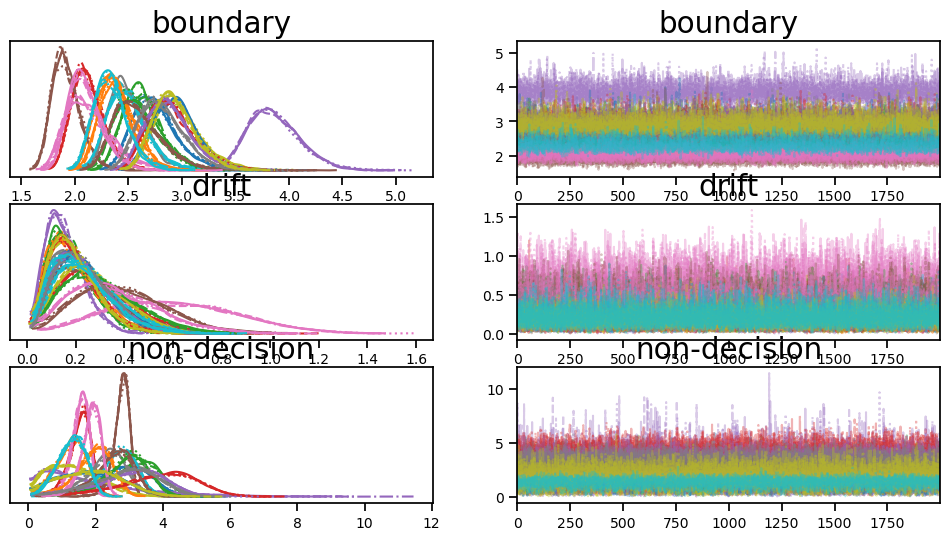

In [39]:
az.plot_trace(posterior_samples2)

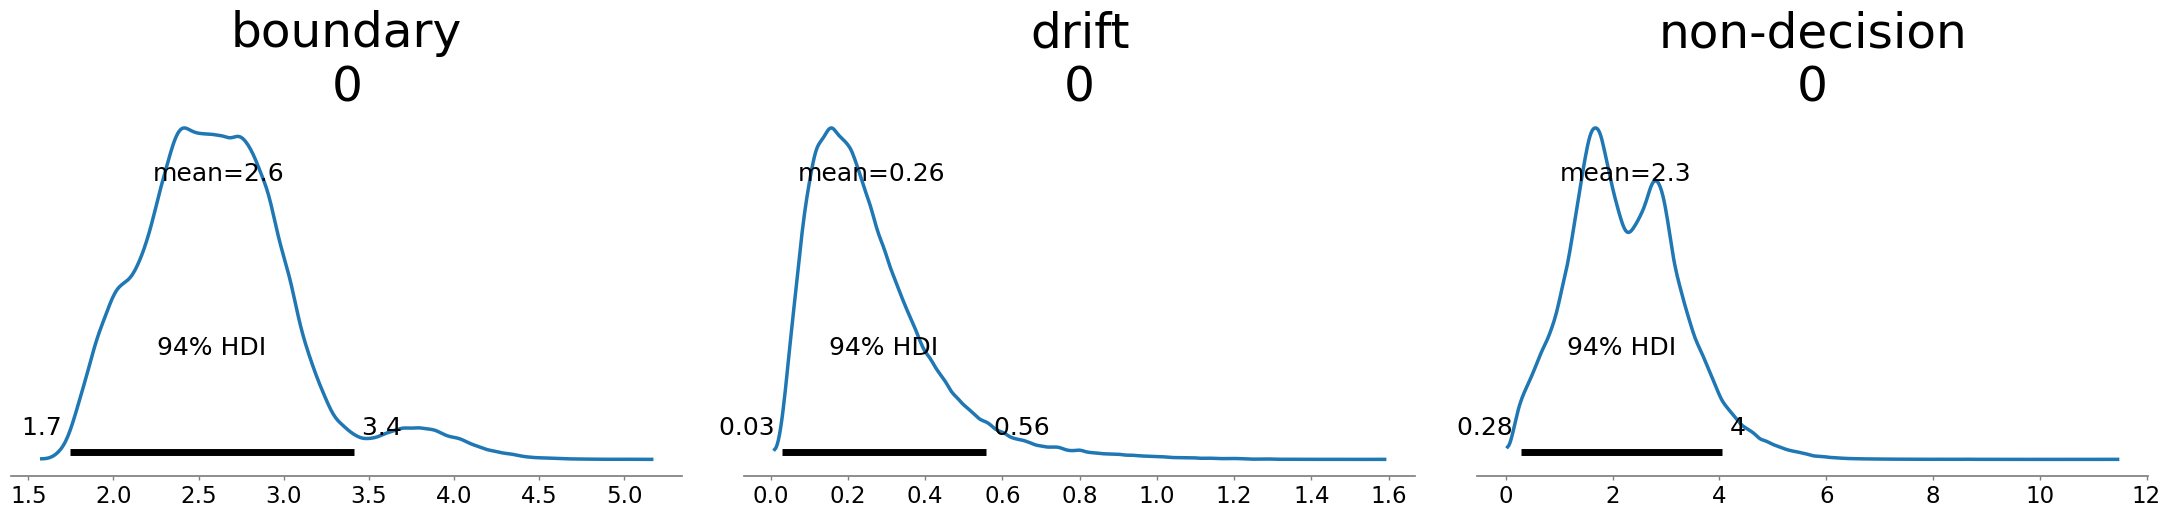

In [40]:
# Plotting the Posterior Distribution for 'posterior_samples2'
az.plot_posterior(posterior_samples2, group="posterior", combine_dims={"boundary_dim_0", "drift_dim_0","non-decision_dim_0"})
plt.tight_layout()

In [41]:
# Sampling the Posterior Predictive Distribution for 'ezdiffusion1'
with ezdiffusion1:

    posterior_chain1 = pm.sample_posterior_predictive(posterior_samples1, extend_inferencedata=True)

Sampling: [RT, X]


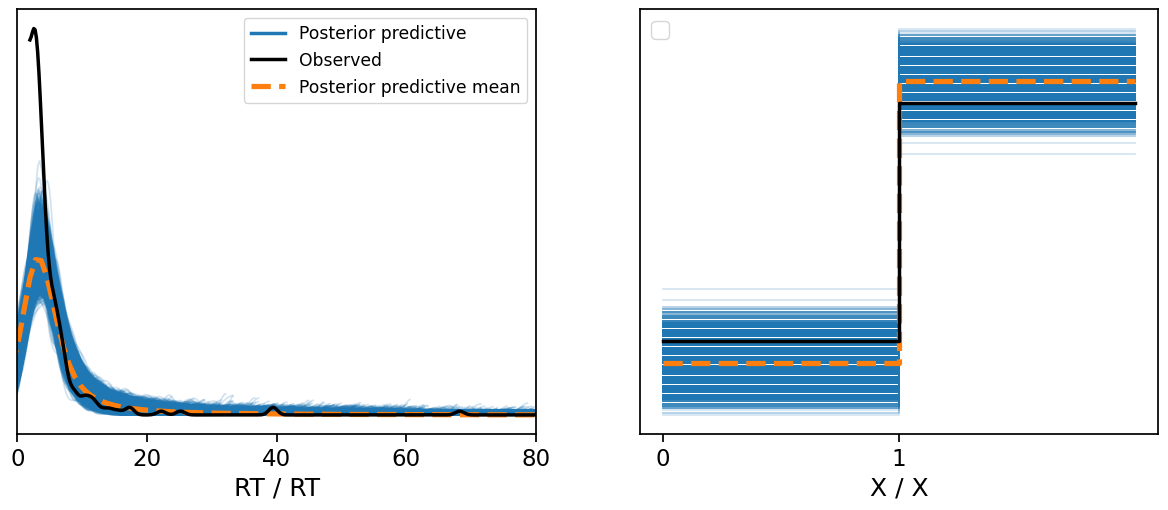

In [42]:
# Plot the posterior predictive distribution
axs = az.plot_ppc(posterior_chain1)
axs[0].set_xlim(0,80)
axs[1].set_xticks([0,1])

In [43]:
with ezdiffusion2:

    posterior_chain2 = pm.sample_posterior_predictive(posterior_samples2, extend_inferencedata=True)

Sampling: [RT, X]


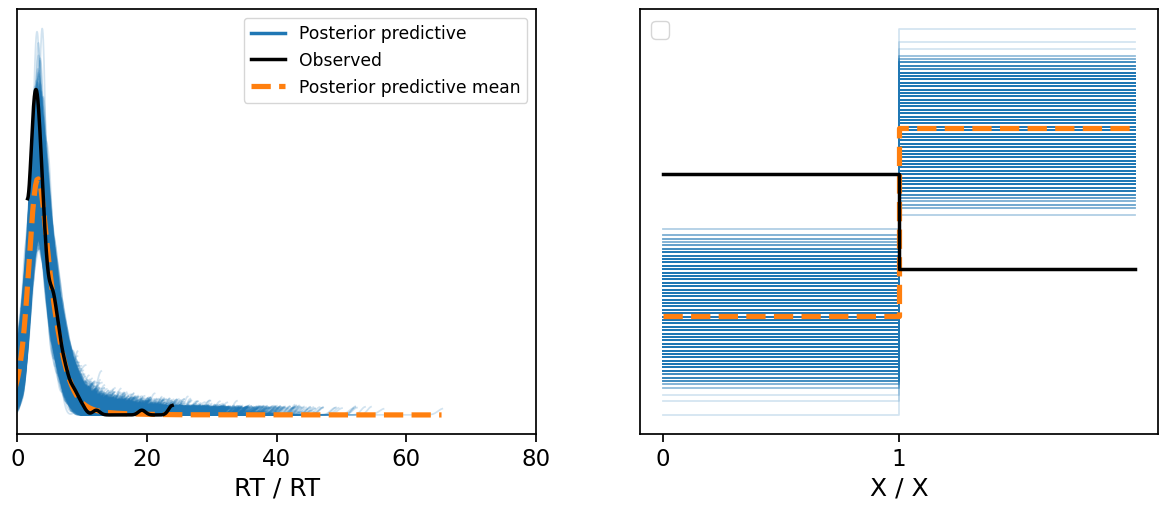

In [44]:
# Plot the posterior predictive distribution
axs = az.plot_ppc(posterior_chain2)
axs[0].set_xlim(0,80)
axs[1].set_xticks([0,1])

In [45]:
# Extract the means of 'boundary' and 'non-decision' parameters for each participant and each condition
boundary_means_easy = posterior_samples1.posterior['boundary'].mean(dim=['chain', 'draw']).values.flatten()
non_decision_means_easy = posterior_samples1.posterior['non-decision'].mean(dim=['chain', 'draw']).values.flatten()

boundary_means_hard = posterior_samples2.posterior['boundary'].mean(dim=['chain', 'draw']).values.flatten()
non_decision_means_hard = posterior_samples2.posterior['non-decision'].mean(dim=['chain', 'draw']).values.flatten()

# Create DataFrames
easy_df = pd.DataFrame({
    'participant_idx': range(len(boundary_means_easy)),
    'boundary': boundary_means_easy,
    'non-decision': non_decision_means_easy,
    'Dataset': 'Easy'
})

hard_df = pd.DataFrame({
    'participant_idx': range(len(boundary_means_hard)),
    'boundary': boundary_means_hard,
    'non-decision': non_decision_means_hard,
    'Dataset': 'Hard'
})

# Concatenate both DataFrames
df = pd.concat([easy_df, hard_df], ignore_index=True)

# Melt the DataFrame to get it in the desired format
melted_df = df.melt(id_vars=['participant_idx', 'Dataset'], var_name='variable', value_name='value')

print(melted_df)

    participant_idx Dataset      variable     value
0                 0    Easy      boundary  2.819890
1                 1    Easy      boundary  3.070171
2                 2    Easy      boundary  4.088543
3                 3    Easy      boundary  2.894898
4                 4    Easy      boundary  3.763575
..              ...     ...           ...       ...
75               15    Hard  non-decision  2.514454
76               16    Hard  non-decision  1.851511
77               17    Hard  non-decision  2.896989
78               18    Hard  non-decision  1.857314
79               19    Hard  non-decision  1.286585

[80 rows x 4 columns]


In [46]:

# Extract the means of 'boundary' and 'non-decision' parameters for each participant and each condition
boundary_means_easy = posterior_samples1.posterior['boundary'].mean(dim=['chain', 'draw']).values.flatten()
drift_means_easy = posterior_samples1.posterior['drift'].mean(dim=['chain', 'draw']).values.flatten()
non_decision_means_easy = posterior_samples1.posterior['non-decision'].mean(dim=['chain', 'draw']).values.flatten()

boundary_means_hard = posterior_samples2.posterior['boundary'].mean(dim=['chain', 'draw']).values.flatten()
drift_means_hard = posterior_samples2.posterior['drift'].mean(dim=['chain', 'draw']).values.flatten()
non_decision_means_hard = posterior_samples2.posterior['non-decision'].mean(dim=['chain', 'draw']).values.flatten()

# Create DataFrames
easy_df = pd.DataFrame({
    'participant_idx': range(len(boundary_means_easy)),
    'boundary': boundary_means_easy,
    'drift': drift_means_easy,
    'non-decision': non_decision_means_easy,
    'Dataset': 'Easy'
})

hard_df = pd.DataFrame({
    'participant_idx': range(len(boundary_means_hard)),
    'boundary': boundary_means_hard,
    'drift': drift_means_hard,
    'non-decision': non_decision_means_hard,
    'Dataset': 'Hard'
})

# Concatenate both DataFrames
df = pd.concat([easy_df, hard_df], ignore_index=True)

# Melt the DataFrame to get it in the desired format
melted_df = df.melt(id_vars=['participant_idx', 'Dataset'], var_name='variable', value_name='value')

print(melted_df)

     participant_idx Dataset      variable     value
0                  0    Easy      boundary  2.819890
1                  1    Easy      boundary  3.070171
2                  2    Easy      boundary  4.088543
3                  3    Easy      boundary  2.894898
4                  4    Easy      boundary  3.763575
..               ...     ...           ...       ...
115               15    Hard  non-decision  2.514454
116               16    Hard  non-decision  1.851511
117               17    Hard  non-decision  2.896989
118               18    Hard  non-decision  1.857314
119               19    Hard  non-decision  1.286585

[120 rows x 4 columns]


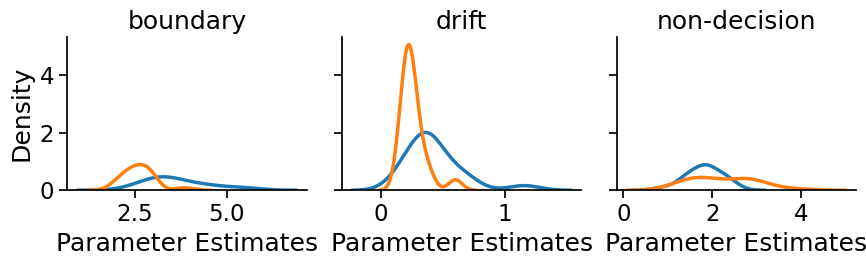

In [47]:
#Creating a Faceted KDE Plot for melted_df
import seaborn as sns

g = sns.FacetGrid(melted_df, col="variable", hue="Dataset", sharex=False)
g.map_dataframe(sns.kdeplot, x="value")

g.set_axis_labels("Parameter Estimates", "Density")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

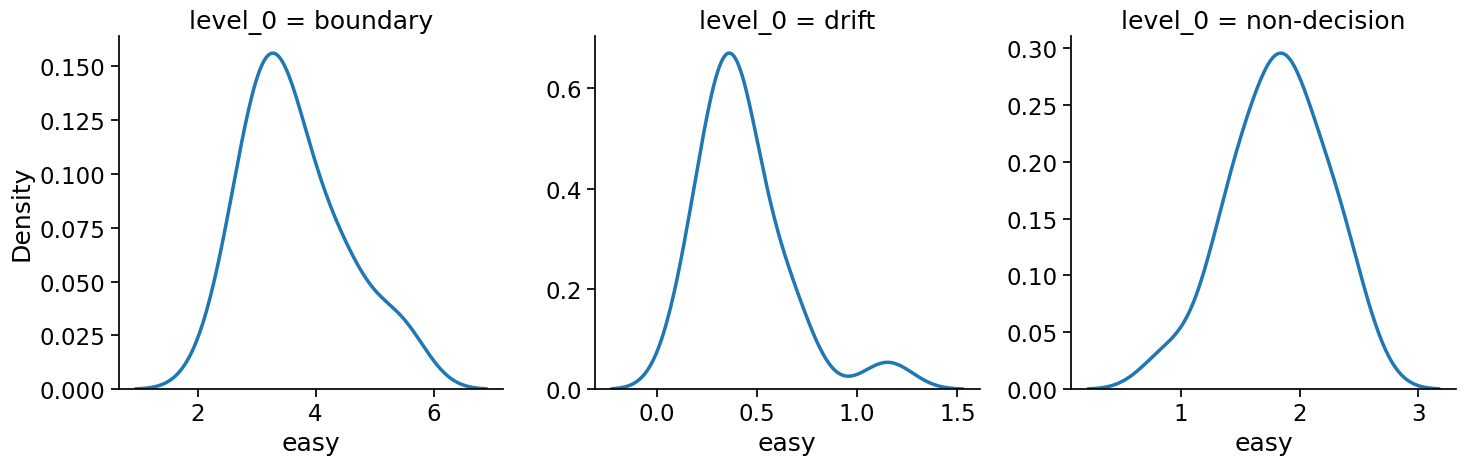

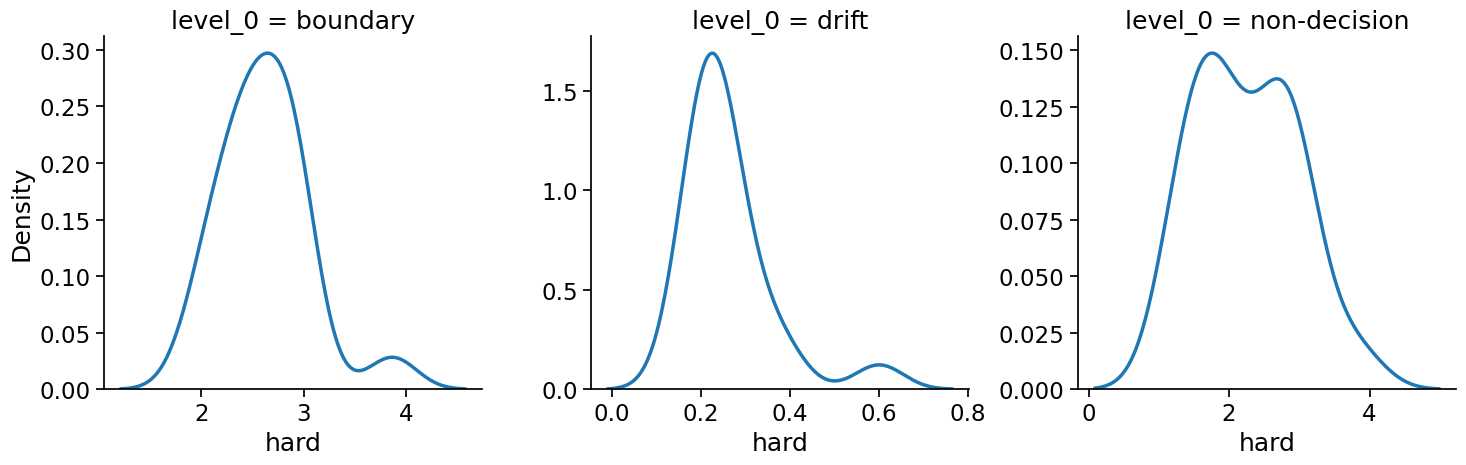

In [48]:
# Preparing Data for Plotting and Creating KDE Plots
df_summ1 = az.summary(posterior_samples1)
df_summ2 = az.summary(posterior_samples2)
df_plot = pd.DataFrame(dict(easy=df_summ1.loc[:,"mean"], hard=df_summ2.loc[:,"mean"]))
df_plot.index = df_plot.index.str.rsplit("[", expand=True)
df_plot = df_plot.reset_index()
sns.displot(df_plot, x="easy", col="level_0", kind="kde",facet_kws={"sharey":False, "sharex":False})
sns.displot(df_plot, x="hard", col="level_0", kind="kde",facet_kws={"sharey":False, "sharex":False})

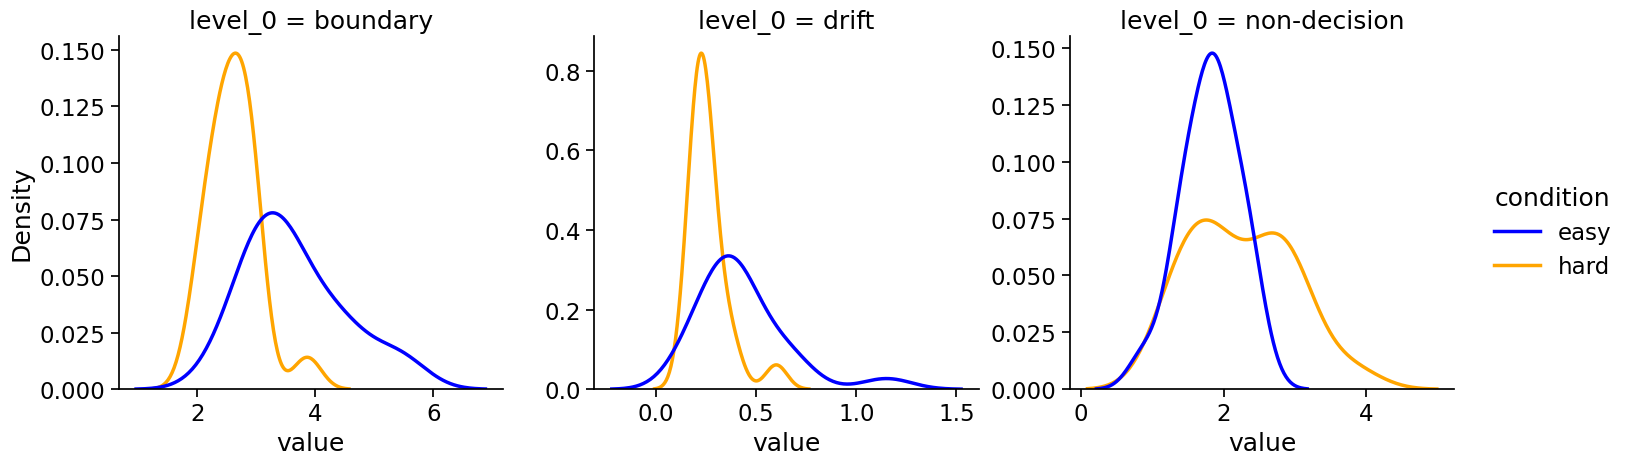

In [49]:
# Reshape data to long format
df_plot_melt = df_plot.melt(id_vars=['level_0', 'level_1'], value_vars=['easy', 'hard'], var_name='condition', value_name='value')

# Make a displot
g = sns.displot(data=df_plot_melt, x="value", hue="condition", col="level_0", 
                kind="kde", facet_kws={"sharey":False, "sharex":False}, palette=['blue', 'orange'])

# Show the plot
plt.show()

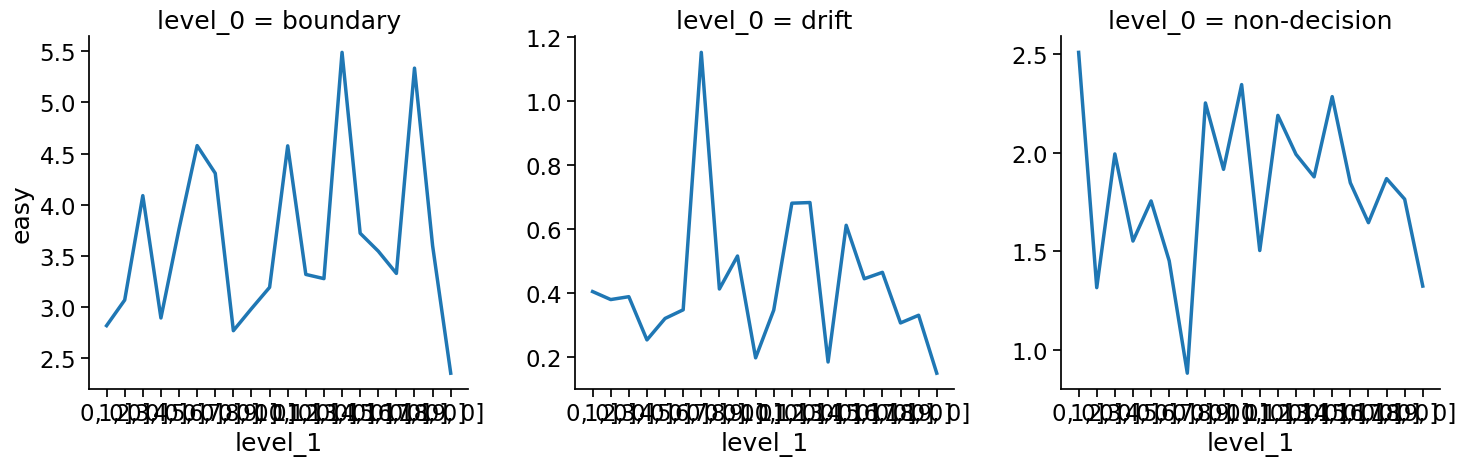

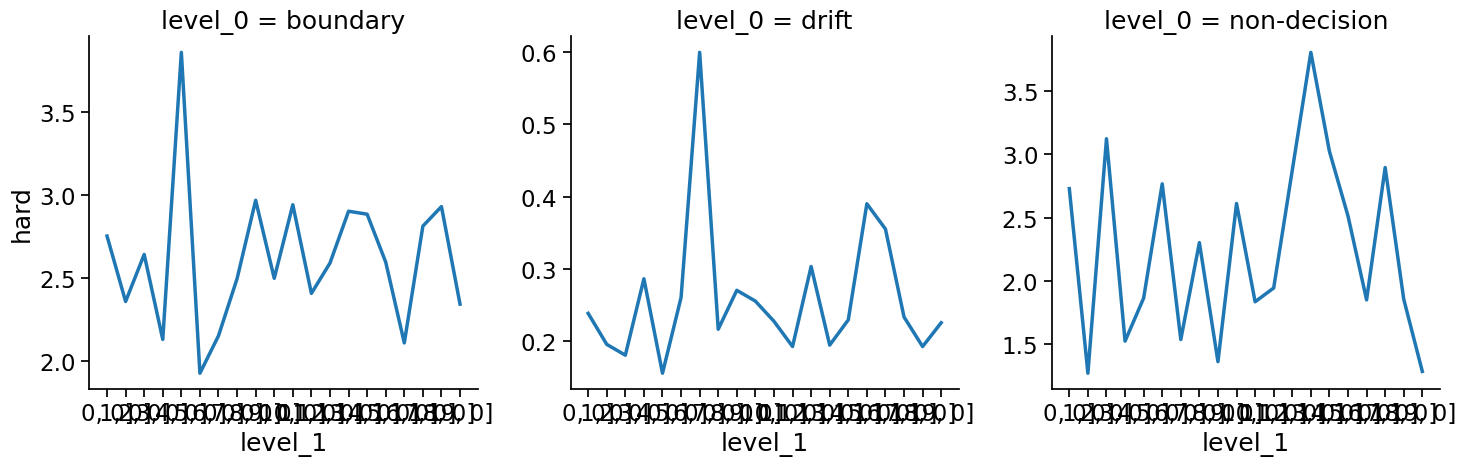

In [50]:
# Creates relational line plots for the "easy" and "hard" conditions, faceted by "level_0".
sns.relplot(df_plot, x="level_1", y="easy", col="level_0", kind="line",facet_kws={"sharey":False, "sharex":False})
sns.relplot(df_plot, x="level_1", y="hard", col="level_0", kind="line",facet_kws={"sharey":False, "sharex":False})

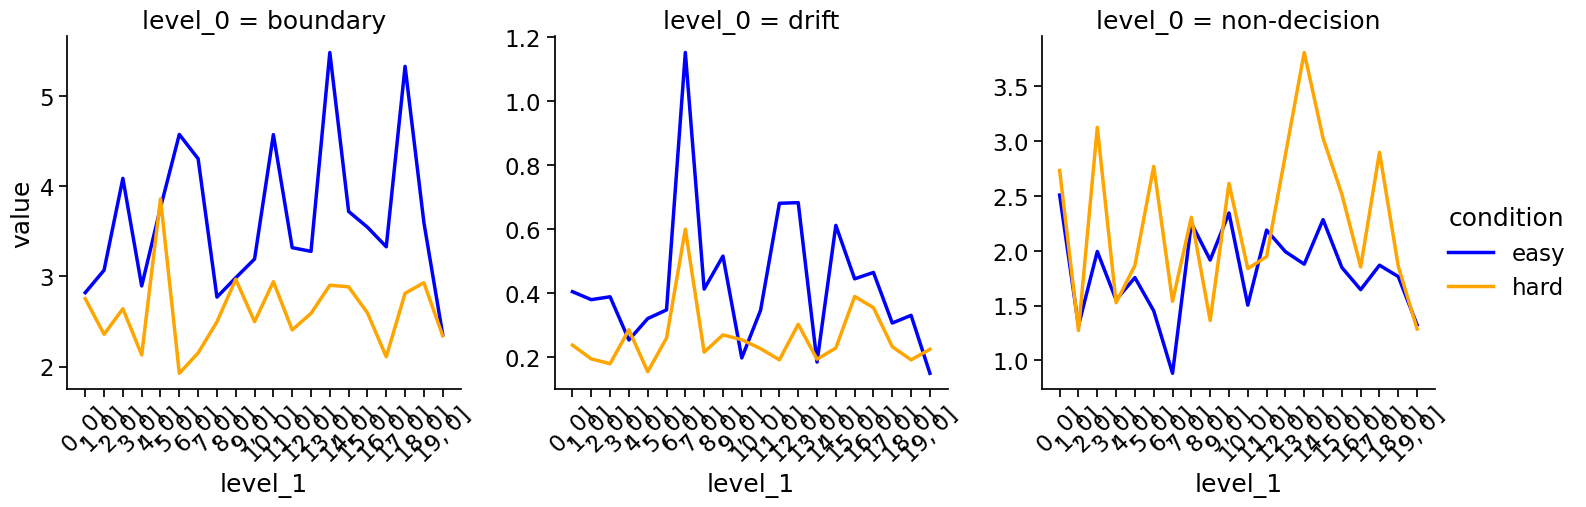

In [51]:
# Separate 'easy' and 'hard' data, creating a 'condition' column
df_plot_easy = df_plot[['easy', 'level_0', 'level_1']].dropna().copy()
df_plot_easy['condition'] = 'easy'
df_plot_easy.rename(columns={'easy': 'value'}, inplace=True)
df_plot_easy.reset_index(drop=True, inplace=True)  # Resetting index

df_plot_hard = df_plot[['hard', 'level_0', 'level_1']].dropna().copy()
df_plot_hard['condition'] = 'hard'
df_plot_hard.rename(columns={'hard': 'value'}, inplace=True)
df_plot_hard.reset_index(drop=True, inplace=True)  # Resetting index

# Combine the two datasets
df_plot_combined = pd.concat([df_plot_easy, df_plot_hard])

# Make a relplot
g = sns.relplot(data=df_plot_combined, x="level_1", y="value", hue="condition", col="level_0", 
                kind="line", facet_kws={"sharey":False, "sharex":False}, palette=['blue', 'orange'])

# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# Show the plot
plt.show()